# <font color="#3A40A2">📘 Introducción al Aprendizaje No Supervisado - Parte práctica </font>

**Materia: Ciencia de Datos aplicada a los Negocios - Universidad de San Andrés**

**Autor: [Lucas BALDEZZARI](https://www.linkedin.com/in/lucasbaldezzari/)**

**2025**

---

## <font color="#004eb3">Temas de la Colab</font>

Para esta clase, los temas que veremos son:

- Repaso de Aprendizaje Supervisado (AS)
- Introducción al Aprendizaje No Supervisado
- Algoritmos de Aprendizaje no Supervisado.
- Técnicas de evaluación y validación.

Es importante prestar atención a los siguientes íconos o emojis que aparezcan a lo largo de la Colab.

- 📘 **Teoría**: Conceptos teóricos.
- 📚 **Lectura**: Material adicional que puedes consultar para profundizar en el tema.
- 📊 **Ejemplo**: Ejemplo para demostrar y/o reforzar conceptos.
- 🔗 **Enlace**: Recursos externos que puedes visitar para obtener más información.
- ❓ **Pregunta**: Preguntas disparadas a lo largo del contenido para reflexionar sobre los ejemplos y conceptos tratados.
- 💻 **Código**: Indica que la celda de abajo es una celda con código y debe ser ejecutada para ver su contenido.

---

## 📘 <font color="#00b351">Repaso de Aprendizaje Supervisado (AS)</font>.

> El *Aprendizaje Supervisado* es una técnica de aprendizaje automático donde el modelo se entrena con un conjunto de datos etiquetados. Esto significa que cada entrada del conjunto de datos tiene una etiqueta o resultado conocido, lo que permite al modelo aprender a predecir resultados para nuevas entradas.

¿Por qué es importante el Aprendizaje Supervisado? El AS es fundamental en muchas aplicaciones prácticas, como la clasificación de correos electrónicos, el reconocimiento de voz, la predicción de precios o resolver problemas de clasificación. Permite a los modelos (máquina) aprender patrones a partir de datos históricos y hacer predicciones en situaciones futuras.

Ejemplos de Aprendizaje Supervisado incluyen:
- *Clasificación*: Asignar una etiqueta a una entrada, como clasificar correos electrónicos como "spam" o "no spam", o diferentes tipos de clientes.
- *Regresión*: Predecir un valor continuo, como el precio de una casa basado en características como el tamaño, la ubicación y el número de habitaciones.
- *Detección de Anomalías*: Identificar datos que se desvían significativamente del comportamiento normal, como detectar fraudes en transacciones financieras.
- *Reconocimiento de Imágenes*: Identificar objetos o características en imágenes, como reconocer rostros en fotos.
- *Procesamiento de Lenguaje Natural (NLP)*: Analizar y comprender el lenguaje humano, como la clasificación de sentimientos en reseñas de productos.
- *Recomendación de Productos*: Sugerir productos a los usuarios basándose en sus preferencias y comportamientos anteriores.
- *Predicción de Series Temporales*: Predecir valores futuros basándose en datos históricos, como pronosticar la demanda de un producto.
- *Análisis de Sentimientos*: Evaluar opiniones o emociones expresadas en texto, como determinar si una reseña es positiva o negativa.
- Entre otros.

#### 📊 **<font color="#d6b302">Prediciendo precios de casas</font>**

Un problema clásico de regresión en el aprendizaje supervisado es la predicción del precio de una casa. En este caso, el modelo se entrena con un conjunto de datos que incluye características de las casas (como cantidad de habitaciones, ubicación, entre otras) y sus precios correspondientes. Una vez entrenado, el modelo puede predecir el precio de una nueva casa basándose en sus características.


#### Set de datos

En este caso usaremos el set de datos llamado *"California Housing"*, que contiene información sobre casas en California, incluyendo características como el número de habitaciones, ubicación, antigüedad media de las casas, el precio de las casas, entre otras. Este set de datos es ampliamente utilizado para demostrar técnicas de regresión en aprendizaje supervisado.

**IMPORTANTE**: Cada fila del set de datos representa un distrito de California.

💻 **Analizando nuestros datos** 💻

Lo primero que se debe hacer en cualquier problema, es analizar los datos que tenemos. Vamos a cargar el set de datos y a generar algunas tablas y gráficos para entender mejor la distribución de los datos y algunas características de las casas.

Para ver esto, deberás ejecutar las celdas de código que se encuentra debajo.

**NOTA: Al ser la primera celda, y la primera vez que se ejecuta, puede tardar un poco más de lo normal (algunos segundos). Esto es porque se están instalando las librerías necesarias para trabajar con los datos y graficar.**

In [1]:
## **** CÓDIGO PYTHON ****

##Clonamos el repositorio para poder usar las funciones
## Esperar unos segundos hasta ver un 100% de descarga
# !git clone https://github.com/lucasbaldezzari/cdan.git

##importamos las funciones a usar
from funciones.intro_ans import *
from funciones import utils ##importo funciones a usar
from sklearn.model_selection import train_test_split

In [2]:
housing = get_housingdata()

print("La cantidad de datos es:", len(housing))

print("Primeras 5 filas del set de datos:")
housing.head()

La cantidad de datos es: 20640
Primeras 5 filas del set de datos:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


❓ ¿Qué características (columnas) conforman nuestro set de datos? ❓

Como podemos ver, tenemos varias columnas que representan diferentes características de los distritos, como el número de habitaciones, la media de la edad de las casas en un distrito particular, y el precio medio de las casas para dicho distrito. Estas características son las que utilizaremos para entrenar nuestro modelo de regresión.

💻 Información resumida 💻

Vamos a analizar algunas columnas de nuestro set de datos de manera rápida.

Por favor, ejecuta la siguiente celda de código.

In [3]:
housing[["housing_median_age","total_rooms","median_income","population","median_house_value"]].describe()

,housing_median_age,total_rooms,median_income,population,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,3.870671,1425.476744,206855.816909
std,12.585558,2181.615252,1.899822,1132.462122,115395.615874
min,1.000000,2.000000,0.499900,3.000000,14999.000000
25%,18.000000,1447.750000,2.563400,787.000000,119600.000000
50%,29.000000,2127.000000,3.534800,1166.000000,179700.000000
75%,37.000000,3148.000000,4.743250,1725.000000,264725.000000
max,52.000000,39320.000000,15.000100,35682.000000,500001.000000


La tabla anterior nos muestra algunas estadísticas descriptivas de las columnas seleccionadas. Por ejemplo, podemos ver que la edad media de las casas es de 28.6 años, el número total de habitaciones varía entre $3$ y $35682$, y el ingreso medio es de aproximadamente $3.87$ (en miles de USD anuales). Además, el valor medio de las casas es de aproximadamente $206855$ (en USD).

💻 Histogramas para analizar distribuciones 💻

Dicen que una imagen vale más que mil palabras, y en este caso, un gráfico puede ayudarnos a entender mejor la distribución de los datos. Vamos a generar algunos histogramas para visualizar la distribución de las características más importantes de las casas.

Por favor, ejecuta la siguiente celda de código.

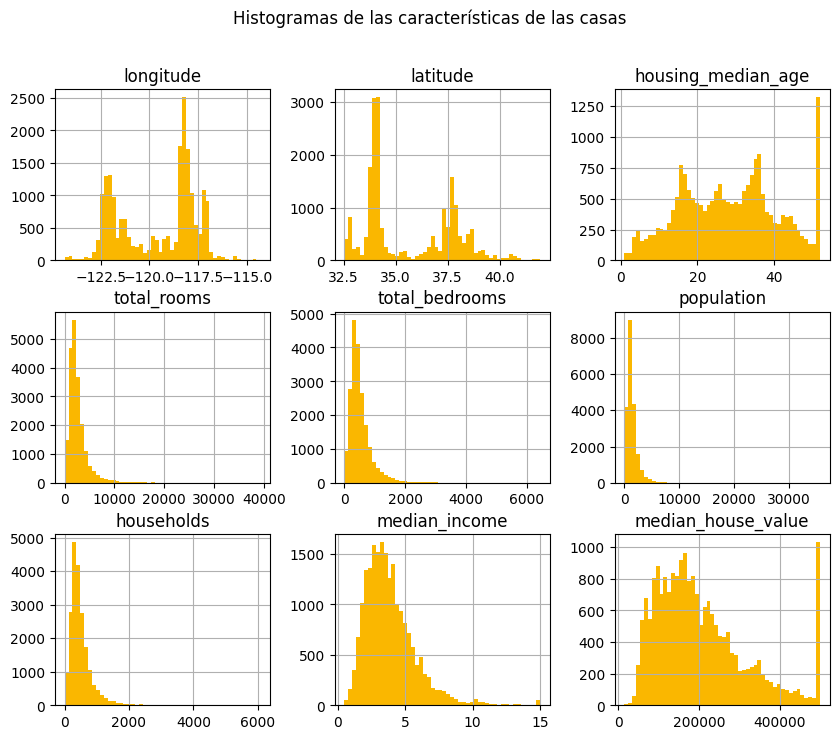

In [4]:
plot_histograms(housing,(10,8))

--- ❓ ---

- ¿Qué información podemos obtener de los histogramas anteriores?
- Hemos visto que la media de la columna `median_house_value` es de aproximadamente $206855$ U$D. ¿Está bien este valor si miramos la distribución? ¿Recomendarías usar la media como una medida representativa del precio de las casas? ¿Por qué?
- ¿Crees que hay alguna característica que podría ser más relevante para predecir el precio de una casa? ¿Por qué?
- ¿Hay alguna característica que crees que no es relevante para predecir el precio de una casa? ¿Por qué?

--- ❓ ---

💻 **Visualizando datos geográficos** 💻

Ahora vamos a generar un gráfico del tipo "dispersión" para visualizar la distribución de las casas en California. En este gráfico, cada punto representará una casa y su color indicará el precio de la casa. Esto nos permitirá ver cómo se distribuyen los precios de las casas en diferentes áreas geográficas.

Por favor, ejecuta la siguiente celda de código.

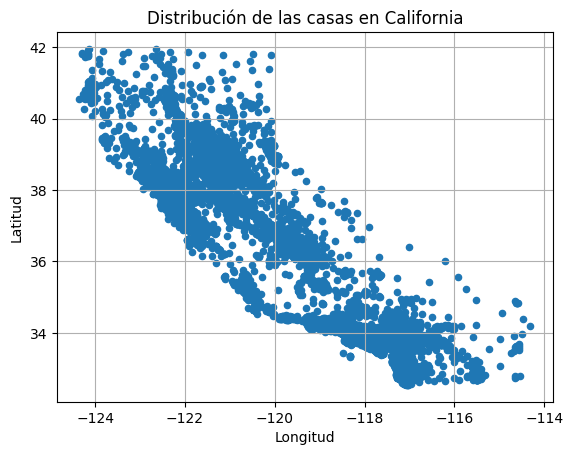

In [5]:
makeSimpleScatterHousing(housing, (8,6))

💻 **Mejorando la visualización geográfica** 💻

Vamos a generar un gráfico que muestre el mapa de California con la distribución de los distritos como puntos en el mapa, además, cada punto tendrá un color que representa el precio de la casa, finalmente, el diámetro de cada punto será proporcional a la población dentro del distrito. Esto nos permitirá visualizar la distribución geográfica de los precios de las casas en California.

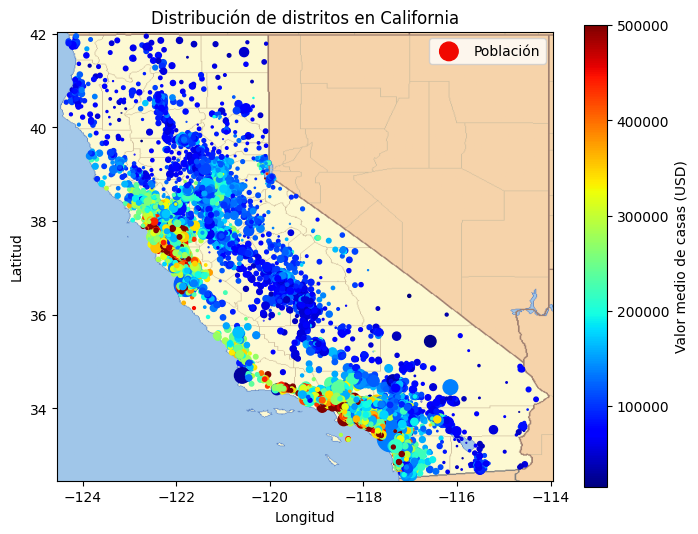

In [6]:
makeBetterScatterHousing(housing, (8,6))

El gráfico anterior es mucho más informativo. Podemos ver, que en general, os distritos más están sobre la costa (lo cual es lo esperable).

💻 **Entrenando un regresor** 💻

Queremos predecir el precio de una casa en función de sus características. Para esto, vamos a entrenar un modelo de **regresión lineal** utilizando el set de datos de California Housing. Este modelo aprenderá a predecir el precio de una casa basándose en las características que hemos analizado anteriormente.

Por favor, ejecuta la siguiente celda de código.

In [7]:
regresor = makeLinearRegressionPipeline(housing) ##cargamos el modelo

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

training_set = strat_train_set.drop("median_house_value", axis=1)
training_labels = strat_train_set["median_house_value"].copy()
test_set = strat_test_set.drop("median_house_value", axis=1)
test_labels = strat_test_set["median_house_value"].copy()

##entrenamos el modelo
regresor.fit(training_set, training_labels)

No se encontró el modelo, se genera uno nuevo.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000208B77054E0>)])),
                ('linearregression', LinearRegression())])

Ahora que hemos entrenado el modelo, podemos hacer algunas predicciones. Veamos los valores de predicción para las primeras 3 casas del set de test.

Por favor, ejecuta la siguiente celda de código.

In [8]:
##hacemos algunas predicciones
print("Predicciones para las primeras 3 casas del set de test:")
predicciones = regresor.predict(test_set.head(3))
print(predicciones,end="\n\n")

print("Valores reales para las primeras 3 casas del set de test:")
print(test_labels.head(3).values)
print("Valores reales para las primeras 3 casas del set de test:",end="\n\n")

print("Errores de las predicciones:")
errores = (((predicciones / test_labels.head(3).values) - 1) * 100).round(2)
print(", ".join([f"{ratio:.1f}%" for ratio in errores]))

Predicciones para las primeras 3 casas del set de test:
[366982.30036318 276964.55916019 352207.85622806]

Valores reales para las primeras 3 casas del set de test:
[397700. 202900. 310000.]
Valores reales para las primeras 3 casas del set de test:

Errores de las predicciones:
-7.7%, 36.5%, 13.6%


**Comentarios finales**

Hemos hecho un repaso rápido de los conceptos de Aprendizaje Supervisado y hemos visto cómo se puede aplicar a un problema de regresión, como la predicción del precio de una casa. Hemos analizado (muy por encima) el set de datos de California Housing, visualizado algunas características importantes y usando un modelo de regresión lineal.

📚

Si estás interesado en profundizar cómo se entrenó el modelo de regresión podés consultar el capítulo 2 del libro *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* de Aurélien Géron, tercera edición.

También podés consultar el siguiente artículo: [Regresión lineal con Scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares).

Si estás interesado en ver cómo generé o entrené el modelo de regresión, se puede ver en el archivo [`funciones/intro_ans.py`](https://github.com/lucasbaldezzari/cdan/blob/main/funciones/intro_ans.py) que se encuentra en el repositorio de GitHub del curso.

📚

---

## 📘 <font color="#00b351">Introducción al Aprendizaje No Supervisado (ANS)</font>

¿Qué es el Aprendizaje No Supervisado?

> El *Aprendizaje No Supervisado* es una técnica de aprendizaje automático donde el modelo se entrena con un **conjunto de datos no etiquetados**. Esto significa que el modelo debe encontrar patrones y estructuras en los datos sin ninguna guía externa.


¿Qué buscamos con el Aprendizaje No Supervisado?

> El objetivo del ANS es descubrir patrones ocultos en los datos, como grupos o clústeres de datos similares, o reducir la dimensionalidad de los datos para facilitar su análisis.

❓ **Preguntas para debatir con tus compañeroas/os** ❓

- ¿En qué problema o ámbito de tu trabajo/emprendimiento/otro crees que podes aplicar Aprendizaje No Supervisado?
- ¿Te ha tocado trabajar con ANS en algún proyecto? ¿Cómo fue tu experiencia?

---

### 📘 <font color="#00b351">Algoritmos para agrupamiento o clustering</font>

¿Qué es el clustering?

> El *clustering* es una técnica de ANS que agrupa datos similares en clústeres  o grupos. El objetivo es identificar estructuras subyacentes u ocultas en los datos y agruparlos de manera que los datos dentro de un mismo grupo sean más similares entre sí que a los datos de otros grupos.

Existen muchos algoritmos de ANS para agrupamiento o clustering, pero algunos de los más comunes son:
- **K-means**: Agrupa datos similares en clústeres o grupos. Utiliza la media de los puntos en cada cluster para representar el centro del cluster.
- **K-medoids**: Similar a K-means, pero utiliza medoids (puntos centrales y reales) en lugar de la media para representar los clústeres.
- **DBSCAN**: Agrupa datos basándose en la densidad de puntos en el espacio.
- **Hierarchical Clustering**: Crea una jerarquía de clústeres, permitiendo visualizar la relación entre ellos.

❓ ¿Qué entendes por similitud en el contexto de negocios? Mencioná un ejemplo ❓

#### 📘 <font color="#1eb59cff">Clustering con *K-means* </font>

¿Qué es K-means?
> K-means es un algoritmo del tipo no supervisado que sirve que busca dividir un conjunto de datos en K grupos.

Una de las características más importantes de K-means es que el número de grupos (K) debe ser especificado por el usuario antes de ejecutar el algoritmo. Esto puede ser un desafío, ya que no siempre está claro cuántos grupos son necesarios o hay dentro de un conjunto de datos particular.

💻 ¿Cuantos grupos crees que hay en el siguiente gráfico? 💻

A continuación, generaremos un gráfico de dispersión para visualizar la distribución de los datos y ver cuántos grupos podemos identificar visualmente. 

Este set de datos contiene las siguientes características:

Por favor, ejecuta la siguiente celda de código para cargar y ver las primeras filas del set de datos.

In [9]:
data = utils.transform_and_get_iris()
features = data.drop(columns="segmento")
segmentos = data["segmento"]
features.head()

,media_visitas_diarias,precio_unitario,unidades_vendidas_mensuales,valoracion_media
0,5.1,3.5,1.4,1.166667
1,4.9,3.0,1.4,1.166667
2,4.7,3.2,1.3,1.166667
3,4.6,3.1,1.5,1.166667
4,5.0,3.6,1.4,1.166667


Las características anteriores representan lo siguiente:

| **Nombre de característica** | **Descripción de negocio**                                           |
|------------------------------|----------------------------------------------------------------------|
| media_visitas_diarias        | Cantidad promedio de visitas diarias al producto (popularidad)      |
| precio_unitario              | Precio en USD del producto (en cientos)                                           |
| unidades_vendidas_mensual    | Unidades vendidas por mes (en cientos)                               |
| valoracion_media             | Valoración media de usuarios (1 a 5).

Ahora, ejecuta la siguiente celda del código para generar un gráfico de dispersión que muestre la cantidad de visitas diarias y el precio unitario de los productos.

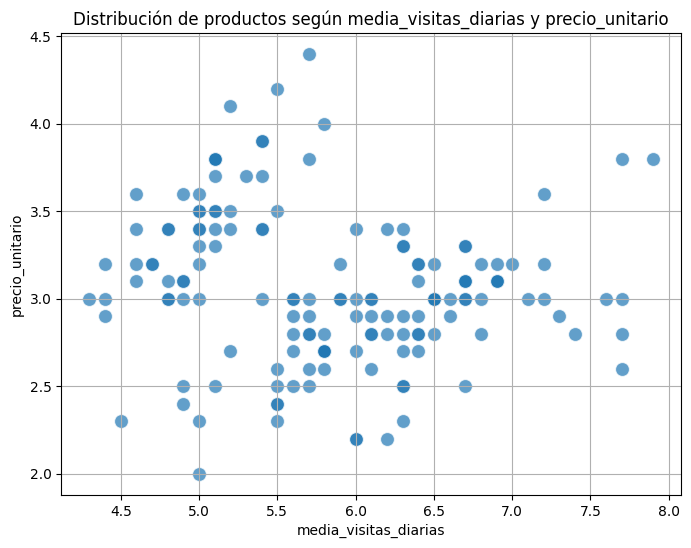

In [10]:
makeScatterForFakeData(features, col1="media_visitas_diarias",col2="precio_unitario", figsize=(8,6))

--- ❓ ---

Observando el gráfico anterior, ¿cuántos grupos crees que hay en los datos? ¿Puedes identificar visualmente los grupos?

--- ❓ ---

💻 Agrupando con K-means 💻

Ahora, vamos a aplicar el algoritmo K-means para agrupar los datos en K clústeres. Para esto, primero debemos elegir el número $K$ de clústeres. En este caso, vamos a usar $K=3$.

Si queres, podes cambiar el valor de $K$ en la celda de código de abajo y probar que pasa para otros valores de $K$. NOTA: No es posible usar valores de K menores a 1, y te recomiendo que no uses valores mayores a 10 para este ejercicio.

Por favor, ejecuta la siguiente celda de código.

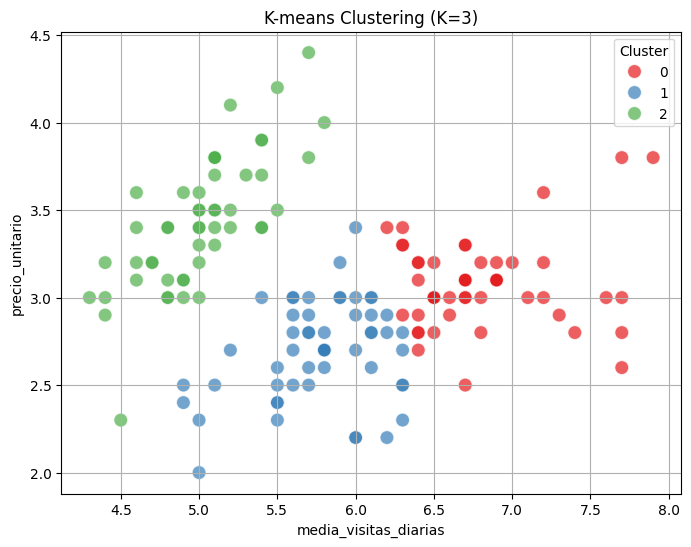

In [11]:
K = 3
makeKmeansAndPlot(features, n_clusters=K, col1="media_visitas_diarias",col2="precio_unitario", figsize=(8,6))

--- ❓ ---

Observando el gráfico anterior:

- ¿Crees que el número de clústeres con $K=3$ es adecuado para los datos? ¿Por qué? ¿Usarías otro valor de $K$? ¿Por qué?
- ¿Qué sucede cuando cambias el valor de $K$? ¿Cómo afecta esto a la visualización y a la agrupación de los datos?

--- ❓ ---

💻 Graficando con centroides 💻

Como hemos dicho, K-means agrupa los datos en K clústeres y calcula un centroide para cada cluster. Vamos a graficar los centroides de los clústeres junto con los datos originales para ver cómo se distribuyen los clústeres y sus centroides.

Por favor, ejecuta la siguiente celda de código.

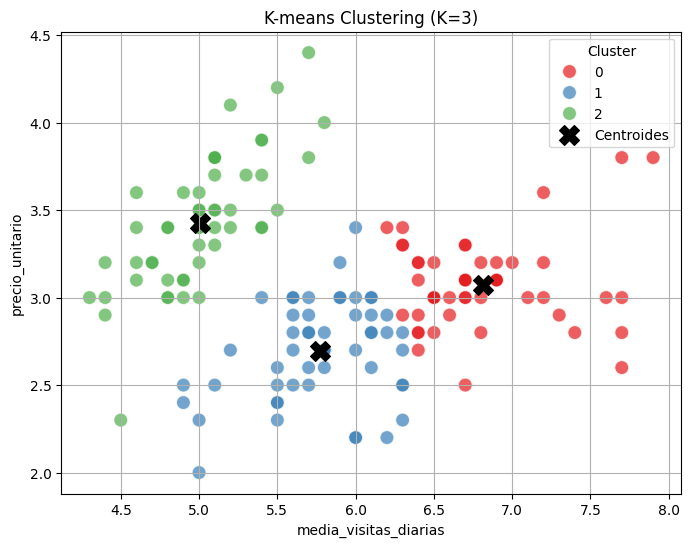

In [12]:
K = 3
makeKmeansAndPlot(features, n_clusters=K, col1="media_visitas_diarias",col2="precio_unitario", figsize=(8,6), centroides=True)

--- ❓ ---

Observando el gráfico anterior:

- ¿Qué podés decir acerca de los centroides de los clústeres? En tu opinión, ¿son representativos de los datos en cada clúster?
- ¿Qué podés decir acerca de los centroides cuando cambias el valor de K? ¿Cómo afecta esto a la visualización y a la agrupación de los datos?

--- ❓ ---

#### 📘 **<font color="#1eb59cff">Clustering con *DBSCAN* </font>**

En muchos casos, la distribución de los datos no es esférica, lo que puede dificultar la identificación de clústeres con K-means. Cuando esto sucede, podemos utilizar el algoritmo DBSCAN, que agrupa datos basándose en la densidad de puntos en el espacio.

DEBSCAN es un algoritmo de agrupamiento que identifica clústeres basándose en la densidad de puntos en el espacio. A diferencia de K-means, DBSCAN no requiere que especifiques el número de clústeres K, sino que utiliza dos parámetros: `eps` (radio de búsqueda) y `min_samples` (número mínimo de puntos para formar un cluster). Aprenderemos más sobre estos parámetros en la clase de Algoritmos Avanzados para clustering.

💻 K-means falla en agrupar 💻

Veamos un ejemplo en el que K-means no logra agrupar correctamente los datos debido a la forma de los clusters.

Por favor, ejecuta la siguiente celda de código.

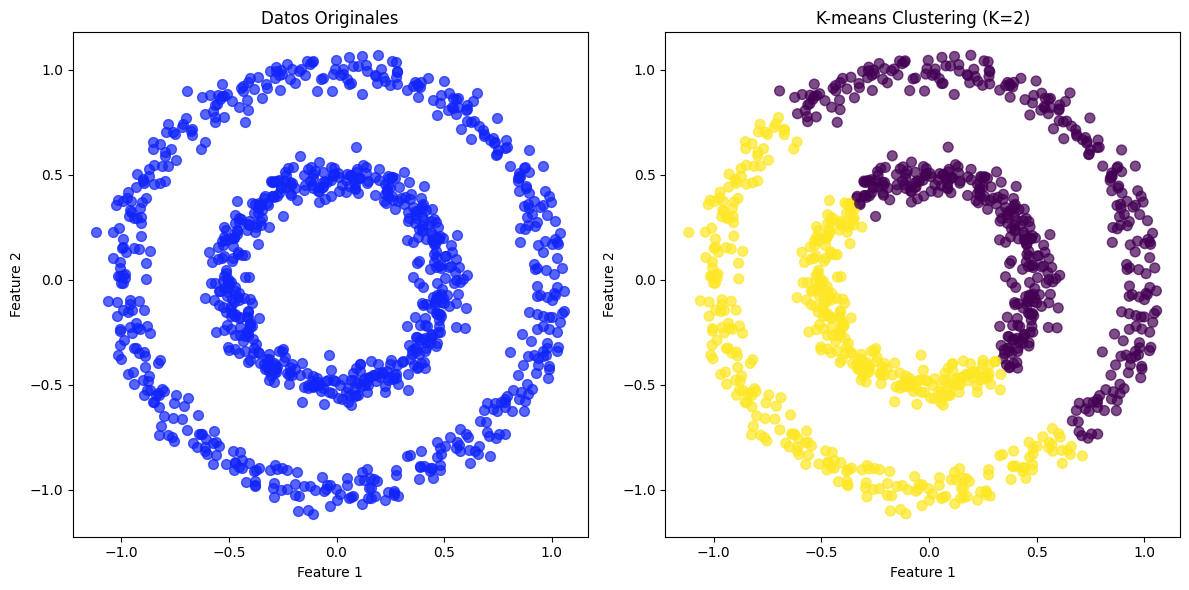

In [13]:
K = 2
showCirclesWithKmeans(figsize=(12,6),n_clusters=K)

A partir de la figura anterior, podemos decir,

1. Es evidente que tenemos dos grupos (gráfico de la izquierda) divididos en circulos.
2. K-means intenta agrupar los datos en dos clusters, pero no logra capturar la forma circular de los datos.

--- ❓ ---

1. ¿Por qué crees que K-means no logra agrupar correctamente los datos en este caso?
2. ¿Qué características de los datos crees que dificultan la identificación de clusters con K-means?

--- ❓ ---

💻 Agrupando con DBSCAN 💻

Ahora, vamos a aplicar el algoritmo DBSCAN para agrupar los datos en clústeres basándose en la densidad de puntos en el espacio.

Por favor, ejecuta la siguiente celda de código.

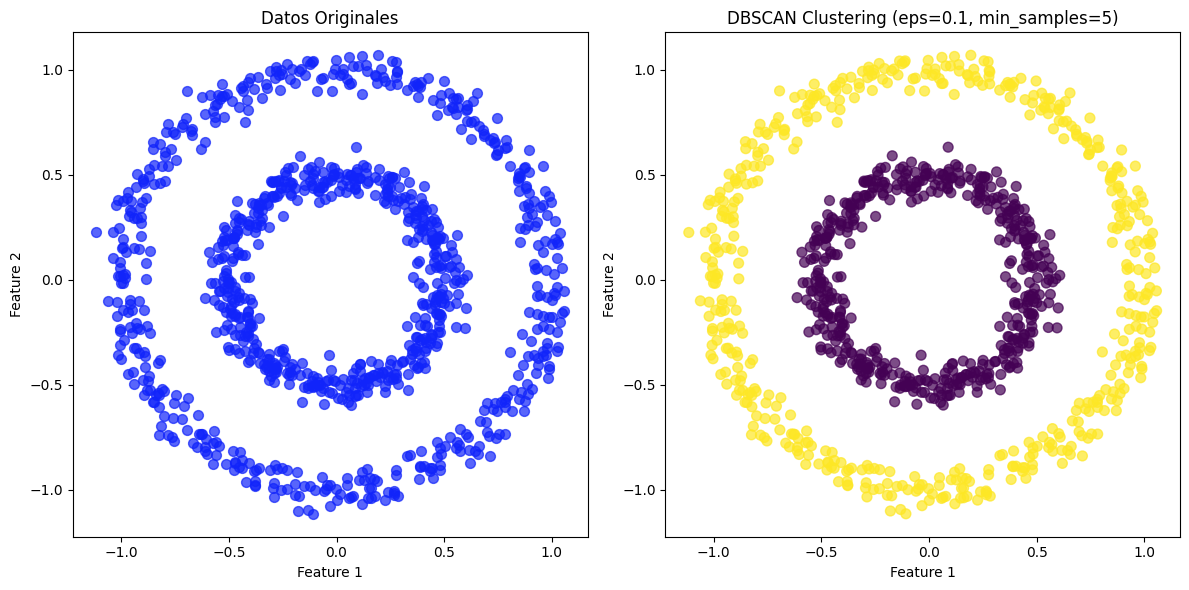

In [14]:
showCirclesWithDBSCAN(figsize=(12,6))

**🤟🏼 ¡NICE! 🤟🏼**

Podemos ver que DBSCAN logra identificar los dos clusters circulares correctamente, a diferencia de K-means.

Aprenderemos el funcionamiento básico de DBSCAN y qué parametros son relevantes para poder agrupar adecuadamente.

---

# 📘 <font color="#00b351">Introducción a técnicas de evaluación y validación</font>

Como sabemos en ANS no tenemos una “respuesta correcta” (etiqueta) contra la cual comparar.

Ante esto, una de las preguntas más habituales en ANS es:

> ¿Cómo sabemos si nuestros clústeres son buenos o no? ¿Como sabemos la cantidad de clústeres que debemos encontrar?


Existen diferentes estrategias, por ejemplo,

- Evaluar la coherencia interna del agrupamiento.
- Si hay etiquetas externas conocidas (por ejemplo, clases ocultas), podamos evaluar la correspondencia externa. Es decir, comparar el agrupamiento con las etiquetas conocidas.

#### **<font color="#009afa">Métricas internas</font>**

Algunas métricas que veremos nos servirán para evaluar la estructura del agrupamiento, a saber:

- Cohesión: qué tan cerca están los puntos dentro de un mismo clúster.
- Separación: qué tan lejos están los clúster entre sí.

Entre las métricas a estudiar, están:

- Puntaje o Coeficiente de Silueta: Mide la similitud de un punto con su propio clúster comparado con otros clústeres. Va de −1 (mal agrupado) a +1 (bien agrupado).
- Índice de Davies-Bouldin: Promedia la similitud entre cada clúster a su clúster más similar. Valores pequeños implican mejor agrupamiento.


#### 📊 **<font color="#d6b302">Determinando la cantidad de grupos</font>**

A continuación intentaremos determinar la cantidad de grupos observando la distribución de puntos en dos dimensiones de un set de datos hipotético. La característica 1 representa la frecuencia mensual de visitas a diferentes tiendas, mientras que la característica 2 representa el gasto mensual de las/os clientes en esas tiendas.

Con base en estos datos, la empresa desea identificar segmentos de clientes con patrones de comportamiento similares para diseñar estrategias de marketing diferenciadas, tales como promociones, recomendaciones personalizadas o programas de fidelización.

**El objetivo es determinar el número óptimo de clusters (k) que mejor representen los distintos perfiles de clientes.**

💻 Graficando nuestros datos 💻

Ejecute la celda de código a continuación para generar un gráfico de dispersión que muestre la distribución de los datos y ver cuántos grupos podemos identificar visualmente.

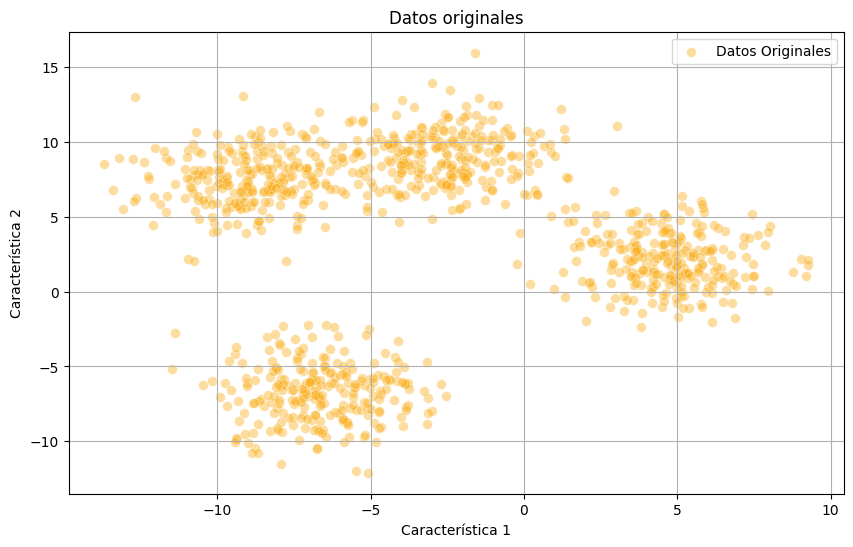

In [15]:
makeAndShowBlobs(cluster_std=1.8)

--- ❓ ---

- ¿Cuántos grupos crees que hay en los datos? ¿Puedes identificar visualmente los grupos?
- ¿Qué cosas podrías hacer para confirmar tu hipótesis?

--- ❓ ---

💻 Probando diferentes cantidad de grupos 💻

A continuación vamos a generar una serie de gráficos que muestran diferentes grupos (diferentes colores) para diferentes cantidades de clusters (K). Esto nos permitirá ver cómo se distribuyen los datos y cómo cambia la agrupación al variar el número de clústers. Además, veremos que los títulos de los gráficos incluyen las métricas de Silueta y Davies-Bouldin para cada valor de K.

Aprenderemos en las próximas clases a usar las métricas de Silueta y Davies-Bouldin para evaluar la calidad del agrupamiento.

Por favor, ejecuta la siguiente celda de código.

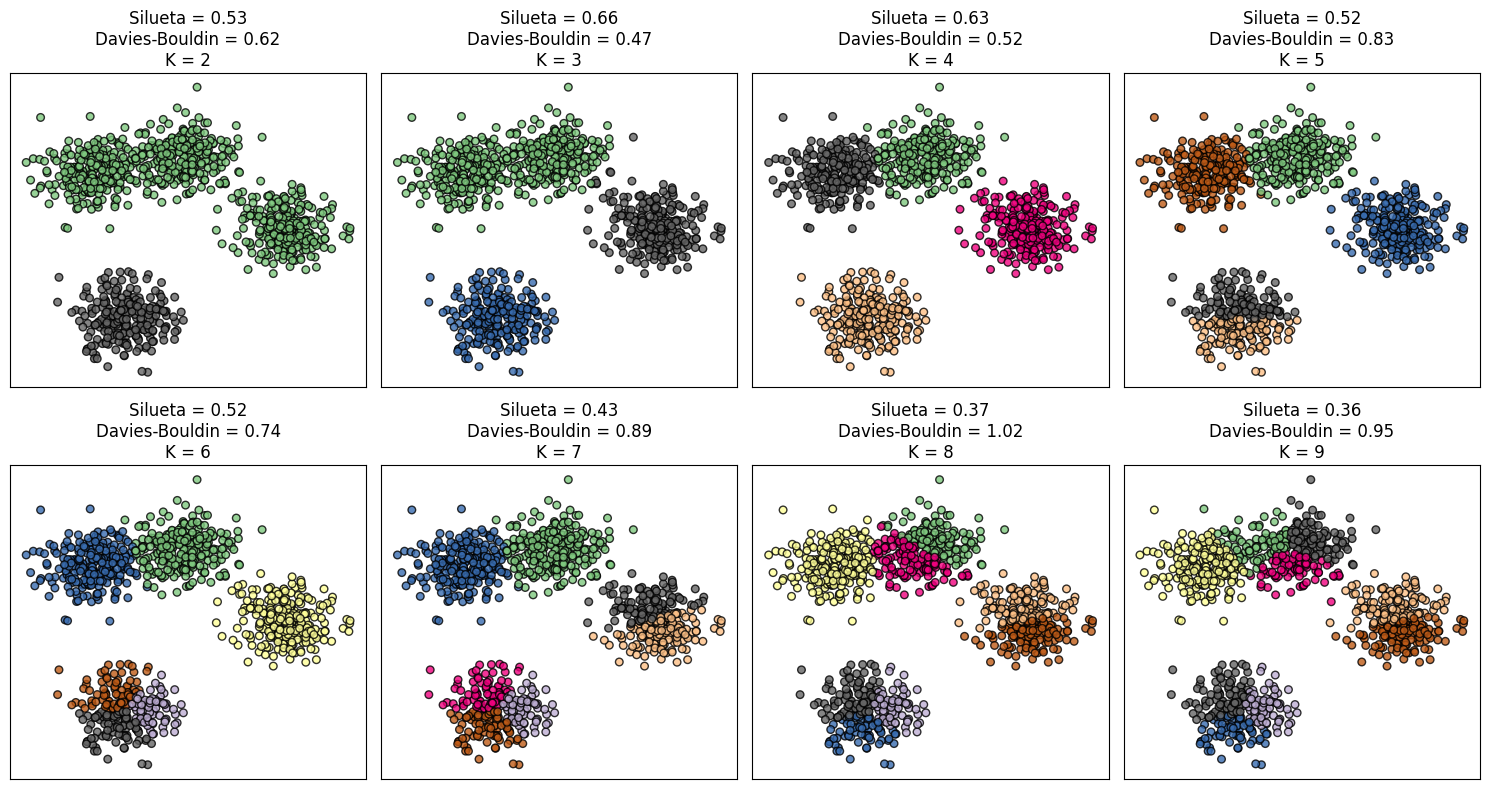

In [16]:
clustersWithMetrics(cluster_std=1.8)

--- ❓ ---

En base a los gráficos generados:

- ¿Cuál cree que es el número óptimo de grupos? ¿Qué criterios uso para determinar esto?

*NOTA*: Aprenderemos a interpretar las métricas de Silueta y Davies-Bouldin en la clase de Algoritmos Avanzados para clustering.

--- ❓ ---

💻 Comparando los datos originales con los datos luego de agrupar 💻

Ahora vamos a comparar los datos originales con los datos luego de agruparlos en base a la cantidad de grupos que consideramos óptima.

Por favor, ejecuta la siguiente celda de código.

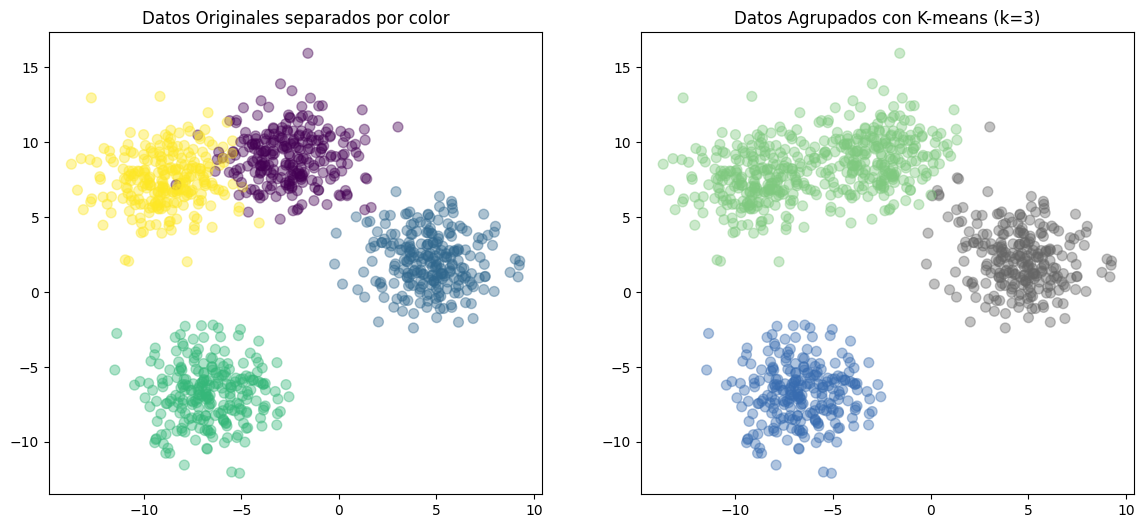

In [17]:
K = 3  
compararOriginalesConAgrupados(cluster_std=1.8, n_clusters=K, figsize=(14,6))

--- ❓ ---

En base a los gráficos generados:

- ¿Crees que su elección de grupos fue la adecuada?
- Modifique el valor de K en la celda anterior y vuelva a ejecutarla, ¿qué puede decir ahora de los grupos generados por K-means? ¿Se ajustan a los verdaderos grupos?
- Para esta distribución de visitas, ¿crees que el agrupamiento elegido es el adecuado?

--- ❓ ---

---
FIN